In [144]:
from ps_utils import *
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import scipy.io as sio

In [188]:
beethoven = sio.loadmat('Beethoven.mat')
buddha = sio.loadmat('Buddha.mat')


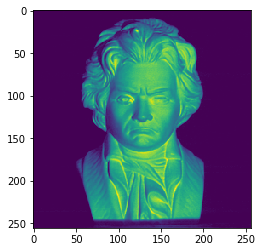

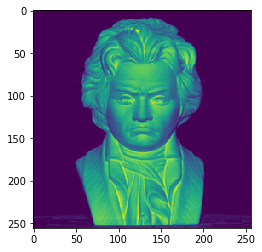

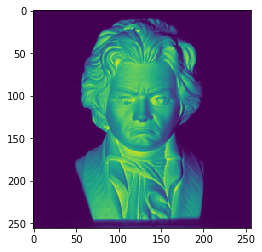

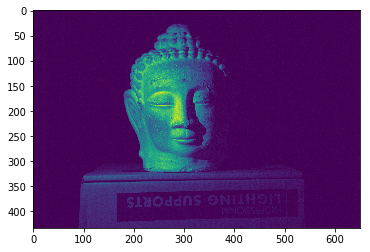

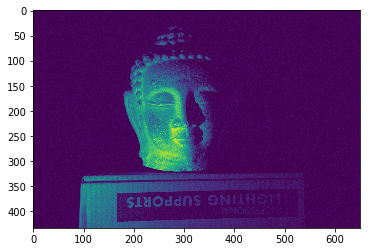

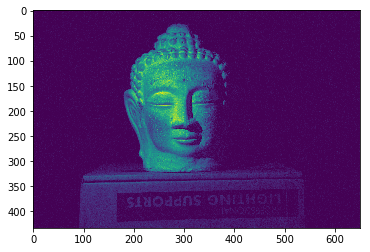

In [189]:
plt.imshow(beethoven['I'][:,:,0])
plt.show()
plt.imshow(beethoven['I'][:,:,1])
plt.show()
plt.imshow(beethoven['I'][:,:,2])
plt.show()

plt.imshow(buddha['I'][:,:,0])
plt.show()
plt.imshow(buddha['I'][:,:,1])
plt.show()
plt.imshow(buddha['I'][:,:,2])
plt.show()

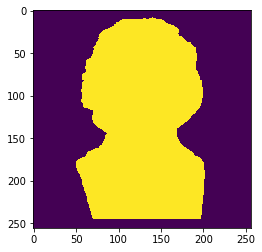

In [190]:
buddha['mask'].shape
buddha['S']

plt.imshow(beethoven['mask'])
plt.show()

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


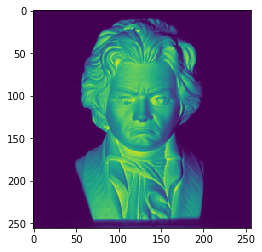

In [191]:
images = beethoven['I']
images.shape

print(images[:,:,0])

new_images = np.stack(images, axis=2)
new_images = np.stack(new_images, axis=2)

plt.imshow(new_images[2])
plt.show()

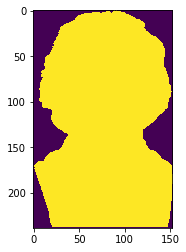

(3, 239, 153)

In [278]:
mask = beethoven["mask"][8:247,49:202]
beetm = beethoven["I"][8:247,49:202,:]
plt.imshow(mask)
plt.show()
bboy = np.stack([beetm[:,:,0],beetm[:,:,1],beetm[:,:,2]], axis=0)
bboy.shape

In [302]:
S = beethoven['S']

S_this = lin.inv(S)
image_shape = beetm.shape

S_flat = np.reshape(S_this, (9,1))

output = []

for x in range(3):
    S = S_flat[x*3:(x+1)*3]
    J_this = bboy[x]
    J_this = np.reshape(J_this, (1,J_this.size))
    dotpd = np.dot(S, J_this)
    #print(lin.norm(dotpd))
    N = dotpd / lin.norm(dotpd, axis=0)
    print(N.shape, N.size)
    N = np.reshape(N, (3,image_shape[0],image_shape[1]))
    print(N.shape, N.size)
    output.append(N)
    

(3, 36567) 109701
(3, 239, 153) 109701
(3, 36567) 109701
(3, 239, 153) 109701
(3, 36567) 109701
(3, 239, 153) 109701


C:\Users\Usert\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [301]:
output_out = unbiased_integrate(output[0], output[1], output[2], mask, order=2)
display_depth_matplotlib(output_out)

ValueError: shape mismatch: value array of shape (28898,) could not be broadcast to indexing result of shape (28898,153)